In [2]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [3]:
glove_file = 'vectors.txt'
word2vec_file = "word2Vec.txt"

glove2word2vec(glove_file, word2vec_file)

C:\Users\Hakan\AppData\Local\Temp\ipykernel_9500\3055688253.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_file)


(253832, 300)

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_file, binary= False)

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv("DATA.csv")

# "kelime" sütunundaki kelimelerin GloVe vektörlerini çekme
word_vectors = {}

for index, row in df.iterrows():
    word = row["kelime"]
    try:
        word_vector = model[word]
        word_vectors[word] = word_vector
    except KeyError:
        print(f"'{word}' kelimesinin GloVe modelinde bir vektörü bulunamadı.")

print(type(word_vector))

'flotör' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'gabin' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'kayırmak' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'seyrisefain' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'mültefit' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'gelberi' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'işve' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'deskriptif' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'akala' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'sivrilmek' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'dürtmek' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'lerze' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'mevzun' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'kraniyum' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'susamak' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'havil' kelimesinin GloVe modelinde bir vektörü bulunamadı.
'gammaz' 

In [6]:
# Köken sütununu ekleme
df["vektörler"] = df["kelime"].apply(lambda word: word_vectors.get(word, None))
df.head()

,kelime,köken,vektörler
0,sığın,Eski Türkçe,"[-0.530465, -0.177799, 0.571167, 0.120554, 0.0..."
1,flotör,Fransızca,None
2,uluhiyet,Arapça,"[-0.370439, 0.08458, 0.097564, 0.124225, 0.081..."
3,gabin,Arapça,None
4,kayırmak,Eski Türkçe,None


In [7]:
df = df.dropna(subset=['vektörler'])
df.head()

,kelime,köken,vektörler
0,sığın,Eski Türkçe,"[-0.530465, -0.177799, 0.571167, 0.120554, 0.0..."
2,uluhiyet,Arapça,"[-0.370439, 0.08458, 0.097564, 0.124225, 0.081..."
6,ağır,Eski Türkçe,"[-0.289039, -0.342054, -0.382934, 0.0366, 0.00..."
7,pek,Eski Türkçe,"[-0.00873, -0.294514, -0.256973, 0.004081, 0.3..."
8,meta,Arapça,"[-0.026622, -0.307892, -0.021013, 0.184977, 0...."


In [24]:
df.shape
df["köken"].unique()

array(['Eski Türkçe', 'Arapça', 'Fransızca ', 'Orta Türkçe', 'Farsça',
       'Türkiye Türkçesi', 'Yeni Latince', 'Latince', 'İspanyolca ',
       'İngilizce ', 'Macarca ', 'Rusça '], dtype=object)

In [53]:
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


df_cleaned = df.dropna(subset=['vektörler']).copy()
label_encoder = LabelEncoder()
df_cleaned['köken_encoded'] = label_encoder.fit_transform(df_cleaned['köken'])


     kelime        köken                                          vektörler  \
0     sığın  Eski Türkçe  [-0.530465, -0.177799, 0.571167, 0.120554, 0.0...   
2  uluhiyet       Arapça  [-0.370439, 0.08458, 0.097564, 0.124225, 0.081...   
6      ağır  Eski Türkçe  [-0.289039, -0.342054, -0.382934, 0.0366, 0.00...   
7       pek  Eski Türkçe  [-0.00873, -0.294514, -0.256973, 0.004081, 0.3...   
8      meta       Arapça  [-0.026622, -0.307892, -0.021013, 0.184977, 0....   

   köken_encoded  
0              1  
2              0  
6              1  
7              1  
8              0  
Arapça: 3281 kelime
Eski Türkçe: 1228 kelime
Farsça: 811 kelime
Fransızca : 2343 kelime
Latince: 56 kelime
Macarca : 7 kelime
Orta Türkçe: 173 kelime
Rusça : 19 kelime
Türkiye Türkçesi: 911 kelime
Yeni Latince: 101 kelime
İngilizce : 862 kelime
İspanyolca : 30 kelime


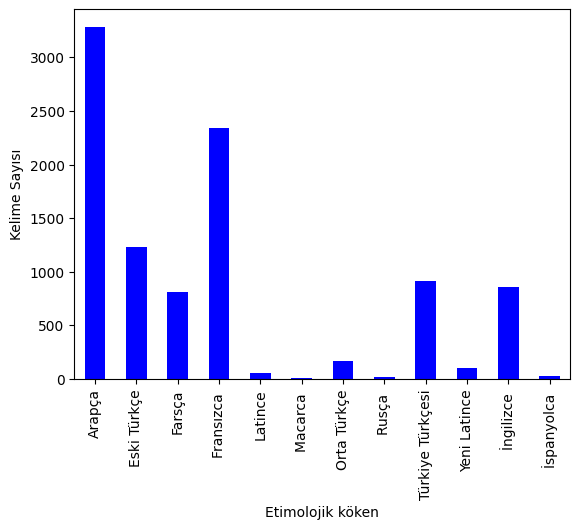

         kelime   köken                                          vektörler  \
515       ruble  Rusça   [-0.364566, -0.692622, 0.404299, -0.393636, -0...   
518      troyka  Rusça   [0.042424, -0.002578, 1.041427, 0.535072, -0.5...   
1533       borç  Rusça   [0.11184, -0.276823, -0.042829, 0.40045, -0.20...   
2198     haraşo  Rusça   [0.356219, 0.395689, 0.274603, -0.626216, -0.5...   
2878   bolşevik  Rusça   [-0.240388, -0.041341, 0.606674, -0.48977, 0.2...   
3304    lubunya  Rusça   [-0.581187, -0.135943, 0.055204, 1.011599, 0.3...   
3673     nataşa  Rusça   [0.33187, -0.149582, -0.468927, 0.166836, -0.3...   
4213    kapuska  Rusça   [-0.021872, 0.633165, -0.001895, 0.319271, -0....   
4793     ponçik  Rusça   [0.018983, 0.840296, -0.098258, -0.078016, -0....   
4827        çar  Rusça   [0.162019, -0.354805, 0.728322, -0.555348, 0.2...   
5483      kefir  Rusça   [0.478241, -0.062445, 0.028933, -0.019142, -0....   
6433      boyar  Rusça   [-0.020845, 0.574509, 0.05603, -0.38145

In [54]:
import pandas as pd
import matplotlib.pyplot as plt




print(df_cleaned.head())


dil_grupları = df_cleaned.groupby('köken').count()['kelime']


dil_grupları.plot(kind='bar', color='blue')
plt.xlabel('Etimolojik köken')
plt.ylabel('Kelime Sayısı')
tablo = pd.DataFrame({'Dil Grubu': dil_grupları.index, 'Kelime Sayısı': dil_grupları.values})


for index, row in tablo.iterrows():
    print(f"{row['Dil Grubu']}: {row['Kelime Sayısı']} kelime")
plt.show()
rus = df_cleaned[df_cleaned["köken"] == "Rusça "]
print(rus)

In [55]:

X = np.vstack(df_cleaned['vektörler'].values)
y = df_cleaned['köken_encoded'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [56]:

logistic_model = LogisticRegression(max_iter=10000)


logistic_model.fit(X_train, y_train)


y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Test Doğruluğu (Logistic Regression): {accuracy_logistic}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, target_names=label_encoder.classes_))
#new_kelime = "uluhiyet"


Test Doğruluğu (Logistic Regression): 0.5982354937224296
Classification Report:
                  precision    recall  f1-score   support

          Arapça       0.72      0.80      0.76       984
     Eski Türkçe       0.58      0.57      0.57       379
          Farsça       0.29      0.18      0.22       241
      Fransızca        0.60      0.70      0.65       718
         Latince       0.00      0.00      0.00        19
        Macarca        0.00      0.00      0.00         2
     Orta Türkçe       0.00      0.00      0.00        50
          Rusça        0.00      0.00      0.00         4
Türkiye Türkçesi       0.39      0.33      0.36       249
    Yeni Latince       0.25      0.16      0.19        38
      İngilizce        0.56      0.47      0.51       255
     İspanyolca        0.60      0.38      0.46         8

        accuracy                           0.60      2947
       macro avg       0.33      0.30      0.31      2947
    weighted avg       0.57      0.60      0.58 

c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [57]:

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(logistic_model, X, y, cv=cv)
accuracy_cv = accuracy_score(y, y_pred_cv)
print(f"CV Doğruluğu: {accuracy_cv}")
print("Classification Report (CV):")
print(classification_report(y, y_pred_cv, target_names=label_encoder.classes_))

c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


CV Doğruluğu: 0.5957035227041336
Classification Report (CV):
                  precision    recall  f1-score   support

          Arapça       0.71      0.79      0.75      3281
     Eski Türkçe       0.54      0.56      0.55      1228
          Farsça       0.33      0.20      0.25       811
      Fransızca        0.60      0.73      0.66      2343
         Latince       0.10      0.07      0.08        56
        Macarca        0.00      0.00      0.00         7
     Orta Türkçe       0.03      0.01      0.02       173
          Rusça        0.40      0.11      0.17        19
Türkiye Türkçesi       0.39      0.29      0.33       911
    Yeni Latince       0.26      0.21      0.23       101
      İngilizce        0.59      0.48      0.53       862
     İspanyolca        0.43      0.30      0.35        30

        accuracy                           0.60      9822
       macro avg       0.37      0.31      0.33      9822
    weighted avg       0.57      0.60      0.58      9822



c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [58]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Doğruluğu (Random Forest): {accuracy_rf}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Test Doğruluğu (Random Forest): 0.5174753987105531
Classification Report:
                  precision    recall  f1-score   support

          Arapça       0.52      0.90      0.66       984
     Eski Türkçe       0.67      0.25      0.37       379
          Farsça       0.52      0.05      0.08       241
      Fransızca        0.49      0.73      0.59       718
         Latince       0.00      0.00      0.00        19
        Macarca        0.00      0.00      0.00         2
     Orta Türkçe       0.00      0.00      0.00        50
          Rusça        0.00      0.00      0.00         4
Türkiye Türkçesi       0.29      0.01      0.02       249
    Yeni Latince       0.00      0.00      0.00        38
      İngilizce        0.48      0.05      0.09       255
     İspanyolca        0.00      0.00      0.00         8

        accuracy                           0.52      2947
       macro avg       0.25      0.16      0.15      2947
    weighted avg       0.49      0.52      0.43      2

c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [60]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


cv_scores_rf = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')


print("CV (Random Forest):")
print(cv_scores_rf)
print(f"Ortalama Doğruluk: {cv_scores_rf.mean()}")


y_pred_cv_rf = cross_val_predict(rf_model, X, y, cv=cv)
print("Classification Report (CV:")
print(classification_report(y, y_pred_cv_rf, target_names=label_encoder.classes_))

c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


CV (Random Forest):
[0.51576806 0.51373347 0.48167006 0.52749491 0.49185336 0.48676171
 0.52138493 0.49898167 0.49287169 0.50407332]
Ortalama Doğruluk: 0.5034593175635498


c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Classification Report (CV:
                  precision    recall  f1-score   support

          Arapça       0.52      0.88      0.65      3281
     Eski Türkçe       0.62      0.26      0.37      1228
          Farsça       0.44      0.04      0.07       811
      Fransızca        0.48      0.73      0.58      2343
         Latince       0.00      0.00      0.00        56
        Macarca        0.00      0.00      0.00         7
     Orta Türkçe       0.00      0.00      0.00       173
          Rusça        0.00      0.00      0.00        19
Türkiye Türkçesi       0.37      0.01      0.02       911
    Yeni Latince       0.00      0.00      0.00       101
      İngilizce        0.53      0.05      0.10       862
     İspanyolca        0.00      0.00      0.00        30

        accuracy                           0.51      9822
       macro avg       0.25      0.16      0.15      9822
    weighted avg       0.48      0.51      0.42      9822



c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [52]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier


svm_model = OneVsRestClassifier(SVC(kernel='linear', C=1, probability=True))


svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Test Doğruluğu (SVM): {accuracy_svm}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

Test Doğruluğu (SVM): 0.5785544621649135
Classification Report:
                  precision    recall  f1-score   support

          Arapça       0.70      0.83      0.76       984
     Eski Türkçe       0.55      0.62      0.58       379
          Farsça       0.15      0.05      0.07       241
      Fransızca        0.57      0.71      0.63       718
         Latince       0.03      0.05      0.04        19
        Macarca        0.00      0.00      0.00         2
     Orta Türkçe       0.07      0.02      0.03        50
          Rusça        0.00      0.00      0.00         4
Türkiye Türkçesi       0.25      0.06      0.09       249
    Yeni Latince       0.11      0.11      0.11        38
      İngilizce        0.54      0.43      0.48       255
     İspanyolca        0.14      0.38      0.21         8

        accuracy                           0.58      2947
       macro avg       0.26      0.27      0.25      2947
    weighted avg       0.53      0.58      0.54      2947



In [61]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


cv_scores_svm = cross_val_score(svm_model, X, y, cv=cv, scoring='accuracy')


print("CV (SVM):")
print(cv_scores_svm)
print(f"Ortalama Doğruluk: {cv_scores_svm.mean()}")


y_pred_cv_svm = cross_val_predict(svm_model, X, y, cv=cv)
print("Classification Report (CV):")
print(classification_report(y, y_pred_cv_svm, target_names=label_encoder.classes_))

c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


CV (SVM):
[0.57782299 0.58087487 0.58757637 0.59266802 0.58044807 0.53767821
 0.58350305 0.56924644 0.57230143 0.56822811]
Ortalama Doğruluk: 0.5750347558183622


c:\Users\Hakan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


KeyboardInterrupt: 